<a href="https://colab.research.google.com/github/Majorine3333/EXPLORATORY-ANALYSIS-WITH-UNSUPERVISED-LEARNING/blob/main/Copy_of_Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the necessary libraries and modules to be used**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the dataset**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data_Combined.xlsx')
df.columns

Index(['Unnamed: 0', 'Patient_Number', 'Glucose_Level', 'Cholestrol', 'Temp',
       'Weight', 'BMI', 'Height', 'Waist_circumference', 'HB', 'Gender_x',
       'Age', 'HLE', 'Smoking', 'Physical_activity', 'PA/week', 'PA level',
       'HPT', 'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol',
       'Kidney_problems', 'Liver_problems', 'Gender_y', 'Participant_Number',
       'Age_of_Participant_b', 'Vaccine_Type', 'Vaccination_Status',
       'Number_of_Doses', 'Boosting_Status', 'Side_Effects',
       'Symptoms_and_Treatment', 'Hospitalization', 'Co-Morbidities',
       'BP_Average', 'Weight_Category', 'Occupation', 'Marital_status',
       'Hazardous exposure', 'Alcohol', 'Symp_Cold', 'Symp_Cough',
       'Symp_Sore_throat', 'Symp_Headache', 'breathlessness', 'taste_Smell',
       'Close_to_Someonewith_Covid', 'COVID-19_comorbidities', 'Symp_Cold_i',
       'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
       'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    258 non-null    int64 
 1   Patient_Number                258 non-null    int64 
 2   Glucose_Level                 258 non-null    int64 
 3   Cholestrol                    258 non-null    int64 
 4   Temp                          258 non-null    int64 
 5   Weight                        258 non-null    int64 
 6   BMI                           258 non-null    int64 
 7   Height                        258 non-null    int64 
 8   Waist_circumference           258 non-null    int64 
 9   HB                            258 non-null    int64 
 10  Gender_x                      258 non-null    int64 
 11  Age                           258 non-null    int64 
 12  HLE                           258 non-null    int64 
 13  Smoking             

In [ ]:
###Dropping columns with no vaccines to prevent errors
df = df.dropna(subset=['Vaccine_Type'])

In [ ]:
df['Vaccine_Type'].value_counts()

Vaccine_Type
Pfizer            115
J&J                41
Nil                41
J&J and Pfizer      4
Name: count, dtype: int64

In [ ]:
df = df[df['Vaccine_Type'].isin(['Pfizer', 'J&J'])]
df

,Unnamed: 0,Patient_Number,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,...,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,break_through,sample_id,APOE2,APOE4,raw_APOE2,raw_APOE4
0,0,1,4,6,36,63,23,2,85,16,...,N,N,NaN,N,N,1,0,0,CC,TT
1,1,2,5,6,36,67,24,2,80,16,...,N,N,N,N,N,2,0,0,CC,TT
2,2,8,5,6,36,95,33,2,112,13,...,N,N,N,N,N,8,0,0,CC,TT
3,3,9,4,6,36,54,22,2,68,9,...,N,N,N,N,N,9,1,0,CT,TT
4,4,11,3,7,37,88,33,2,96,14,...,N,N,N,N,N,11,0,0,CC,TT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,706,5,4,36,92,38,2,103,14,...,N,NaN,N,N,N,706,0,2,CC,CC
249,249,707,17,6,36,73,30,2,93,15,...,N,N,N,N,N,707,0,0,CC,TT
252,252,710,7,6,36,80,31,2,106,13,...,N,N,N,N,N,710,1,0,CT,TT
253,253,712,5,6,36,44,19,2,76,12,...,N,N,N,N,N,712,0,2,CC,CC


##**Feature Engineering**

In [ ]:
df = df.drop(columns=['Patient_Number','Participant_Number','sample_id',])


In [ ]:
#vaccine_status = ["Boosting_Status", "Vaccination_Status"]
#df['vaccine_status'] = df[vaccine_status].mode(axis=1).iloc[:, 0]
#df.drop(columns=vaccine_status, inplace=True)
df

,Unnamed: 0,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,Gender_x,...,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,break_through,APOE2,APOE4,raw_APOE2,raw_APOE4
0,0,4,6,36,63,23,2,85,16,2,...,N,N,N,NaN,N,N,0,0,CC,TT
1,1,5,6,36,67,24,2,80,16,2,...,N,N,N,N,N,N,0,0,CC,TT
2,2,5,6,36,95,33,2,112,13,1,...,N,N,N,N,N,N,0,0,CC,TT
3,3,4,6,36,54,22,2,68,9,2,...,N,N,N,N,N,N,1,0,CT,TT
4,4,3,7,37,88,33,2,96,14,2,...,N,N,N,N,N,N,0,0,CC,TT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,5,4,36,92,38,2,103,14,2,...,N,N,NaN,N,N,N,0,2,CC,CC
249,249,17,6,36,73,30,2,93,15,2,...,N,N,N,N,N,N,0,0,CC,TT
252,252,7,6,36,80,31,2,106,13,2,...,N,N,N,N,N,N,1,0,CT,TT
253,253,5,6,36,44,19,2,76,12,2,...,N,N,N,N,N,N,0,2,CC,CC


###**Separating according to numerical and categorical features**

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()


###**Imputing the numerical and categorical features of missing values**

In [ ]:
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical] = numerical_imputer.fit_transform(df[numerical])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical] = categorical_imputer.fit_transform(df[categorical])


###**Encoding the categorical features to unique numerical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming `categorical` is a list of column names containing categorical variables
label_encoder = LabelEncoder()
encoded_df = df.copy()  # Make a copy of original DataFrame

for col in categorical:
    encoded_df[col] = encoded_df[col].astype(str)
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

In [ ]:
scaled_df=encoded_df   # changing name of encoded dataframe.

In [ ]:
pip install kneed

###**Using the Elbow method to determine the number of clusters**

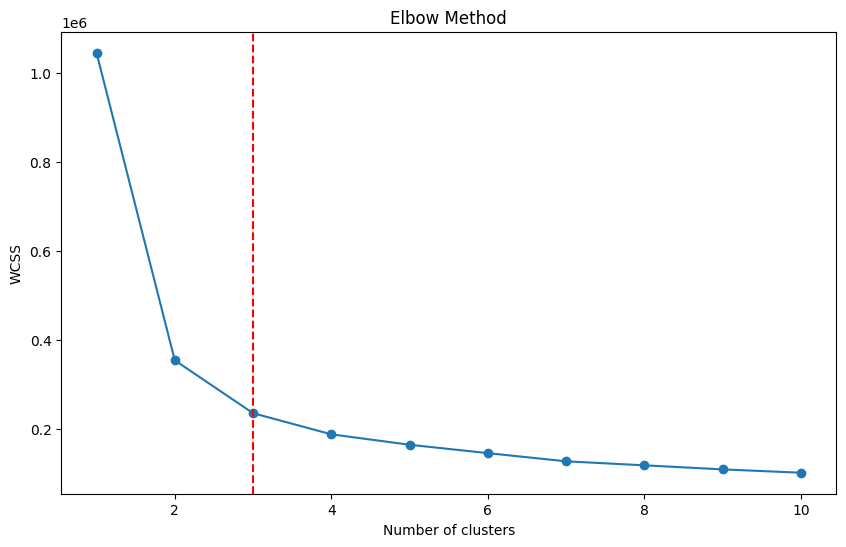

In [ ]:
from kneed import KneeLocator
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state =42)
  kmeans.fit(scaled_df)
  WCSS.append(kmeans.inertia_)


kl = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
elbow = kl.elbow

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.axvline(x=elbow, color='r', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


###**Visualizing the data points **

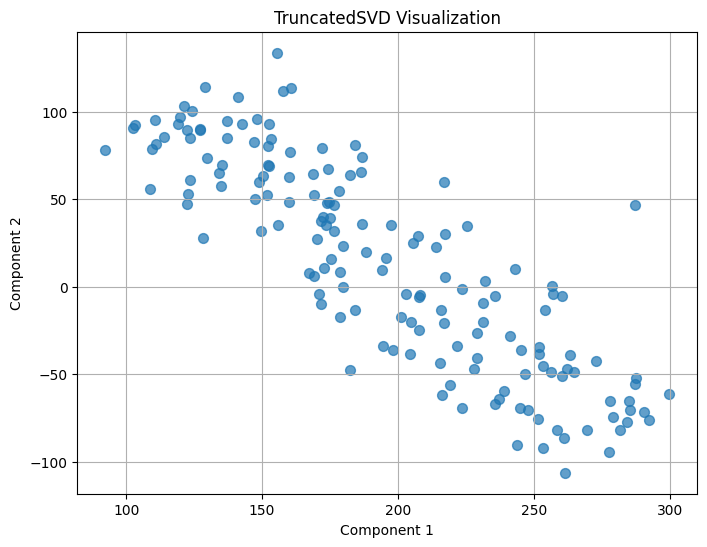

In [ ]:
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(scaled_df)

# Create a DataFrame for easy plotting
svd_df = pd.DataFrame(data=svd_result, columns=['Component 1', 'Component 2'])

plt.figure(figsize=(8, 6))
plt.scatter(svd_df['Component 1'], svd_df['Component 2'], s=50, alpha=0.7)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TruncatedSVD Visualization')
plt.grid(True)
plt.show()


###**Building the K-means clustering model with the optimal number of clusters**

In [ ]:
model = KMeans(n_clusters=elbow, init='k-means++', max_iter=300, n_init=1,random_state=42)
model.fit(scaled_df)
labels = model.labels_

###**Evaluating the model using Silhouette Score**

In [ ]:
silhouette_avg = silhouette_score(scaled_df, labels)
print(f"Silhouette Score for {elbow} clusters: {silhouette_avg}")


Silhouette Score for 3 clusters: 0.4068003640309411


###**Evaluating the model using Calinski-Harabasz Score**

In [ ]:
calinski_harabasz = calinski_harabasz_score(scaled_df, labels)
print(f"Calinski-Harabasz Score for {elbow} clusters : {calinski_harabasz}")

Calinski-Harabasz Score for 3 clusters : 262.3190805290373


###**Evaluating the model using Within-Cluster Sum of Squares(WCSS)**

In [ ]:
wcss = kmeans.inertia_
print(f'WCSS for the {elbow} clusters : {wcss}')

WCSS for the 3 clusters : 101924.57784622787


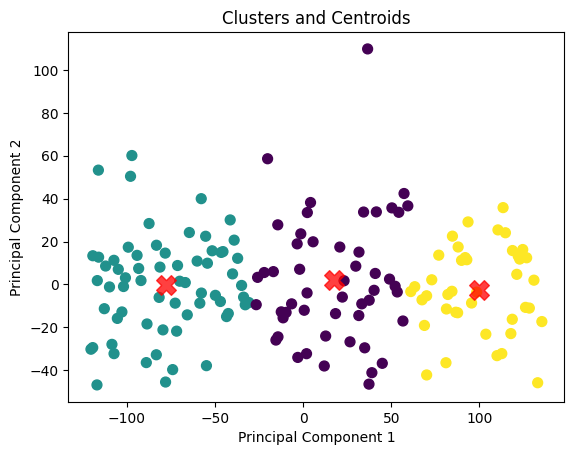

In [ ]:
#VISUALIZING OUR CLUSTERS
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA


# Converting DataFrame to numpy array
data = scaled_df.values

# Fitting K-Means
kmeans = KMeans(n_clusters=3,random_state=42,max_iter=300, n_init=1)
kmeans.fit(data)

# Getting cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# If the data has more than 2 features, use PCA to reduce to 2 dimensions for plotting
if data.shape[1] > 2:
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    reduced_centroids = pca.transform(centroids)
else:
    reduced_data = data
    reduced_centroids = centroids

# Plotting
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters and Centroids')
plt.show()

In [ ]:
#EXPLANATION OF K-MEANS CLUSTERING
# Obtaining a Silhouette score of 0.406, CH score of 262.319 and WCSS of 101924.578 indicate that the clustering has effectively grouped similar data points into distinct clusters,
#demonstrating good clustering performance.

###**Using the RandomForestClassifier to predict clusters given the features**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = scaled_df  # Your feature matrix
cluster_labels =labels  # K-means cluster labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, cluster_labels, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict cluster labels on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9375
Confusion Matrix:
[[13  1  0]
 [ 0 12  0]
 [ 1  0  5]]


In [ ]:
pip install shap

In [ ]:
import shap
explainer = shap.Explainer(rf_classifier)
shap_values = explainer(X_train)
if len(shap_values.values.shape)==3:
  shap_values = shap_values.values[:,:,0]
else:
  shap_values = shap_values.values

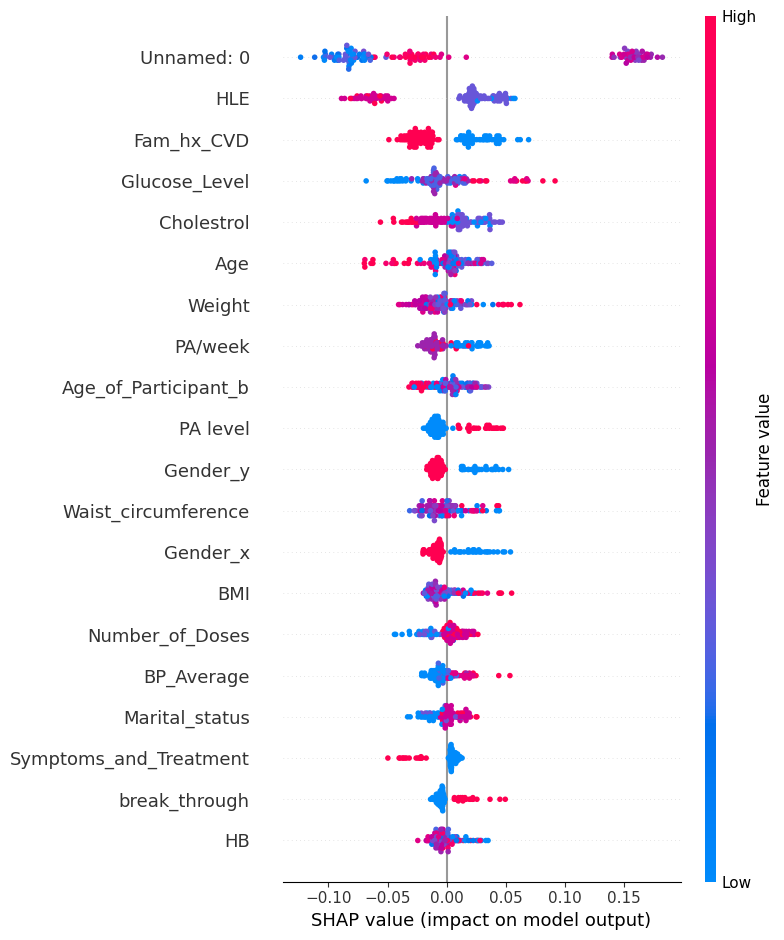

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names = X_train.columns, plot_type="dot", show=False)

In [ ]:
# Calculate mean absolute SHAP values across instances
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Get column names (feature names)
feature_names = X_train.columns.values

# Select top 5 features based on mean absolute SHAP values
top_n = 5
selected_features = feature_names[np.argsort(-mean_abs_shap_values)[:top_n]]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: ['Unnamed: 0' 'HLE' 'Fam_hx_CVD' 'Glucose_Level' 'Cholestrol']


In [ ]:
# unnamed column dropped because from the data frame, it was just numbering.
Selected_features=['HLE' 'Fam_hx_CVD', 'Glucose_Level', 'Cholestrol']
#creating a column called cluster for the dataset
df['Cluster']=labels

In [ ]:
vaccine_distribution = df.groupby(['Cluster','Vaccine_Type']).size().unstack(fill_value=0)
#vaccine_distribution = vaccine_distribution.reset_index()
print("Distribution of vaccine types in each cluster:")
print(vaccine_distribution)

Distribution of vaccine types in each cluster:
Vaccine_Type  J&J  Pfizer
Cluster                  
0               9      42
1              22      42
2              10      31


In [ ]:
bt_distribution = df.groupby(['Cluster', 'break_through']).size().unstack(fill_value=0)
#bt_distribution = bt_distribution.reset_index()
print("Distribution of BT infections in each cluster:")
print(bt_distribution)

Distribution of BT infections in each cluster:
break_through   N   Y
Cluster              
0              36  15
1              54  10
2              34   7


In [ ]:
# Calculate total number and percentage of BT infections for each vaccine
vaccine_bt = df.groupby(['Cluster','Vaccine_Type']).agg(
    total_vaccinated=('Vaccine_Type', 'size'),
    total_bt_infections=('break_through', lambda x: (x == 'Y').sum())
)
vaccine_bt['percent_bt_infections'] = 100 * vaccine_bt['total_bt_infections'] / vaccine_bt['total_vaccinated']
#vaccine_bt = vaccine_bt.reset_index()
print("Total number and percentage of BT infections for each vaccine:")
print(vaccine_bt)

Total number and percentage of BT infections for each vaccine:
                      total_vaccinated  total_bt_infections  \
Cluster Vaccine_Type                                          
0       J&J                          9                    3   
        Pfizer                      42                   12   
1       J&J                         22                    3   
        Pfizer                      42                    7   
2       J&J                         10                    1   
        Pfizer                      31                    6   

                      percent_bt_infections  
Cluster Vaccine_Type                         
0       J&J                       33.333333  
        Pfizer                    28.571429  
1       J&J                       13.636364  
        Pfizer                    16.666667  
2       J&J                       10.000000  
        Pfizer                    19.354839  


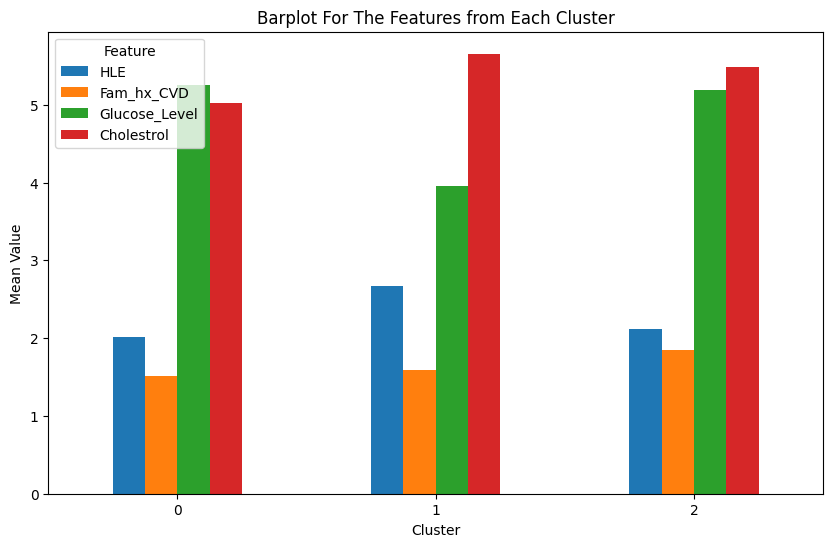

In [ ]:
#Plot of a representation of important features in each cluster

Selected_features=['HLE','Fam_hx_CVD', 'Glucose_Level', 'Cholestrol']



cluster_means = df.groupby('Cluster')[Selected_features].mean()
# Plotting bar graph
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Barplot For The Features from Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()

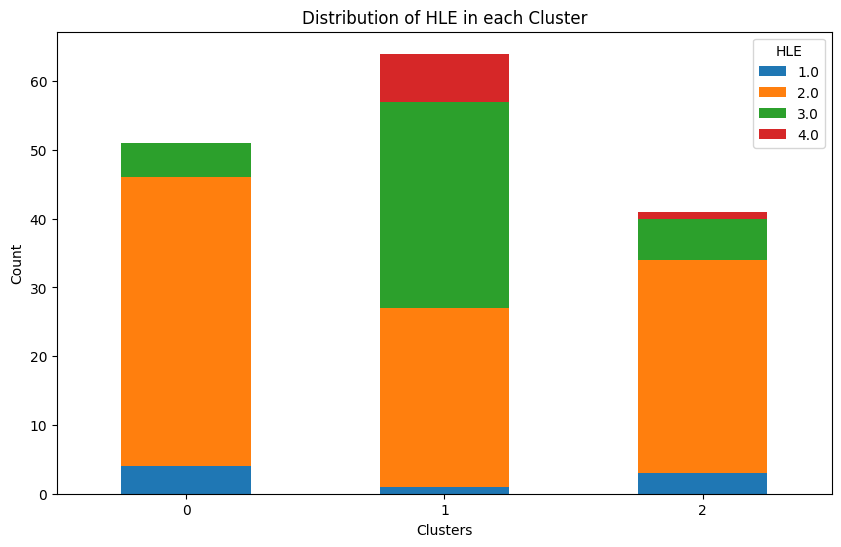

In [ ]:
# Count the occurrences of HLE within each cluster
genotype_counts = df.groupby(['Cluster','HLE' ]).size().reset_index(name='count')

# Pivot the table for plotting
genotype_pivot = genotype_counts.pivot(index='Cluster', columns='HLE', values='count').fillna(0)

# Plotting the bar graph
genotype_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of HLE in each Cluster')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='HLE')
plt.show()

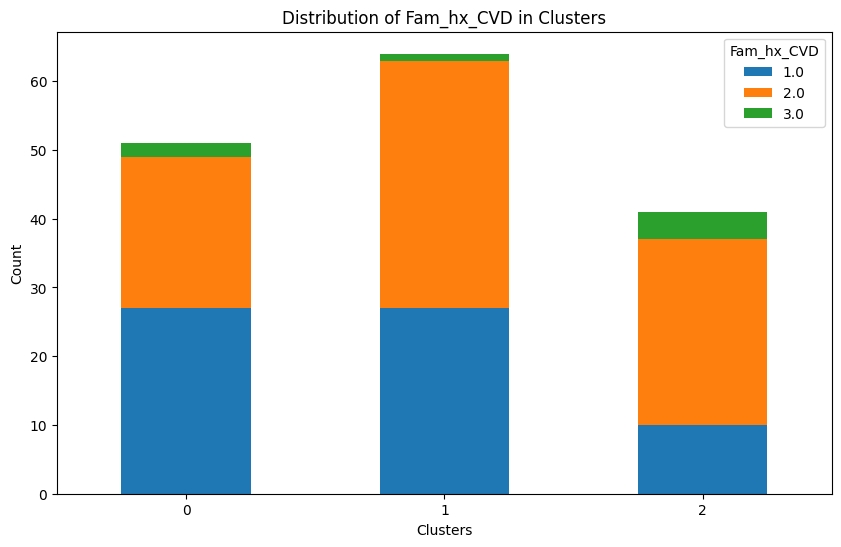

In [ ]:
# Count the occurrences of Fam_hx_CVD within each cluster
genotype_counts = df.groupby(['Cluster','Fam_hx_CVD' ]).size().reset_index(name='count')

# Pivot the table for plotting
genotype_pivot = genotype_counts.pivot(index='Cluster', columns='Fam_hx_CVD', values='count').fillna(0)

# Plotting the bar graph
genotype_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Fam_hx_CVD in Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fam_hx_CVD')
plt.show()

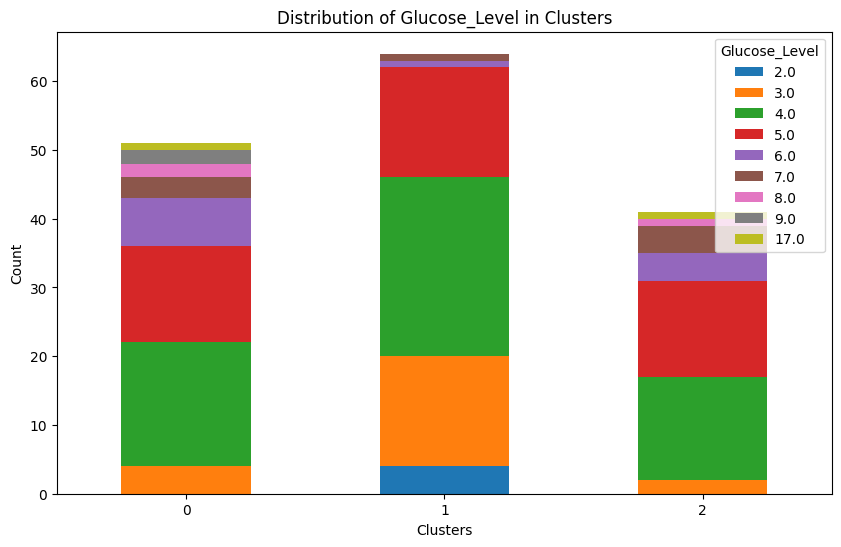

In [ ]:
# Count the occurrences of Glucose_Level within each cluster
genotype_counts = df.groupby(['Cluster','Glucose_Level']).size().reset_index(name='count')

# Pivot the table for plotting
genotype_pivot = genotype_counts.pivot(index='Cluster', columns='Glucose_Level', values='count').fillna(0)

# Plotting the bar graph
genotype_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Glucose_Level in Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Glucose_Level')
plt.show()

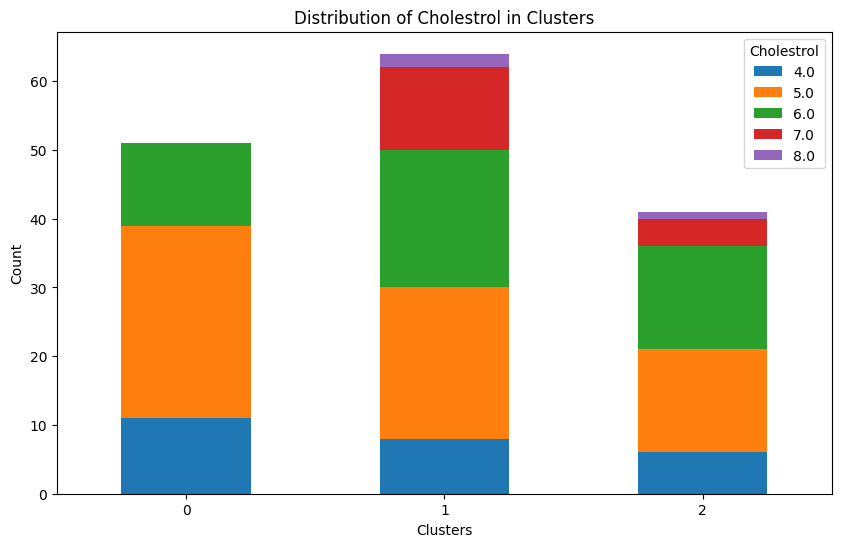

In [ ]:
# Count the occurrences of Cholestrol within each cluster
genotype_counts = df.groupby(['Cluster','Cholestrol' ]).size().reset_index(name='count')

# Pivot the table for plotting
genotype_pivot = genotype_counts.pivot(index='Cluster', columns='Cholestrol', values='count').fillna(0)

# Plotting the bar graph
genotype_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Cholestrol in Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cholestrol')
plt.show()

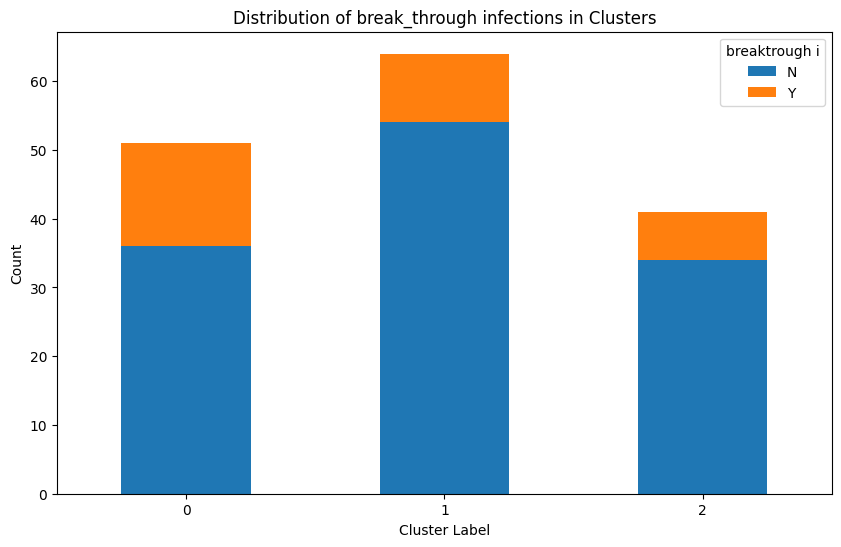

In [ ]:
# Plot of the represenation of breaktrough in each cluster
# Count the occurrences of each Glucose_Level within each cluster
break_through_counts = df.groupby(['Cluster','break_through' ]).size().reset_index(name='count')

# Pivot the table for plotting
genotype_pivot = break_through_counts.pivot(index='Cluster', columns='break_through', values='count').fillna(0)

# Plotting the bar graph
genotype_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of break_through infections in Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='breaktrough i')
plt.show()

Distribution of the number of Cholestorol, Glucose_Level and Alcohol consumption categorical values in all clusters

In [ ]:
# Distribution of Cholestrol in each cluster
Cholestrol_distribution = df.groupby(['Cluster', 'Cholestrol']).size().unstack(fill_value=0)
print("Distribution of Cholestrol in each cluster:")
print(Cholestrol_distribution)

Distribution of Cholestrol in each cluster:
Cholestrol  4.0  5.0  6.0  7.0  8.0
Cluster                            
0            11   28   12    0    0
1             8   22   20   12    2
2             6   15   15    4    1


In [ ]:
# Distribution of 'Glucose_Level' in each cluster
Glucose_Level_distribution = df.groupby(['Cluster', 'Glucose_Level']).size().unstack(fill_value=0)
print("Distribution of Glucose_Level in each cluster:")
print(Glucose_Level_distribution)

Distribution of Glucose_Level in each cluster:
Glucose_Level  2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   17.0
Cluster                                                            
0                 0     4    18    14     7     3     2     2     1
1                 4    16    26    16     1     1     0     0     0
2                 0     2    15    14     4     4     1     0     1


In [ ]:
# Distribution of BP in each cluster
BP_Average_Level_distribution = df.groupby(['Cluster', 'BP_Average' ]).size().unstack(fill_value=0)
print("Distribution of BP in each cluster:")
print(BP_Average_Level_distribution)

Distribution of BP in each cluster:
BP_Average  High Normal  Mild_Hypertension  Moderate_Hypertension  Normal  \
Cluster                                                                     
0                    22                  9                      3      10   
1                    31                  8                      3      18   
2                    22                  8                      0       9   

BP_Average  Optimal  Severe_Hypertension  
Cluster                                   
0                 6                    1  
1                 4                    0  
2                 2                    0  


In [ ]:
# Distribution of Fam_hx_CVD in each cluster
Fam_hx_CVD_distribution = df.groupby(['Cluster', 'Fam_hx_CVD']).size().unstack(fill_value=0)
print("Distribution of Fam_hx_CVD in each cluster:")
print(Fam_hx_CVD_distribution)  #1.0 is for yes,2.0 is for no and 3.0 is for unsure

Distribution of Fam_hx_CVD in each cluster:
Fam_hx_CVD  1.0  2.0  3.0
Cluster                  
0            27   22    2
1            27   36    1
2            10   27    4


In [ ]:
# Distribution of HLE in each cluster
Glucose_Level_distribution = df.groupby(['Cluster', 'HLE']).size().unstack(fill_value=0)
print("Distribution of HLE in each cluster:")
print(Glucose_Level_distribution)

Distribution of HLE in each cluster:
HLE      1.0  2.0  3.0  4.0
Cluster                    
0          4   42    5    0
1          1   26   30    7
2          3   31    6    1


##**Observation**


We have observed that


*  Cluster 0 had the highest number of breakthroughs , a total of 61% of breakthrough infections while Clusters 1 and 2 had very similar percentage of breaktrough infection of value 30% .
* 55% of people in Cluster 0 had a cholesterol level of 5 which is normal.
*   Cluster 0 seems to consist of individuals with lower cholesterol levels, with no representation of higher levels while Cluster 1 is the most diverse in terms of cholesterol levels, including the highest number of individuals with higher cholesterol levels (7.0 and 8.0), all while Cluster 2 had an intermediate distribution.

* 52% of people in cluster 0 have a family history of cardiovascular disease. Cluster  1 have lesser perecentage of individuals, which is 42.2%,with a family history of cardiovascular disease.  Cluster  2 also have an even lesser number of individuals, which is 24.3%, with a family history of cardiovascular disease.  .


*   20 out of 64 participants in cluster 1 had low glucose level  which is considered to be less than 4.0 while cluster 0 and 1 had very few in that category.



*   For the J&J Vaccine, the percentage of breakthrough infections is highest in Cluster 0 and lowest in Cluster 2.
* Similarly for the Pfizer Vaccine, the percentage of breakthrough infections is highest in Cluster 0 and lowest in Cluster 2, but the differences are not as pronounced as with the J&J vaccine.








##**Conclusion**

In conclusion,


*   Family history of cardiovascular disease could be an important feature of the profiles of participants who get a breakthrough infection due to its importance on the SHAP graph and how it is distributed in the clusters.
*   Hence medical practitioners should consider this in the treatment of their patients and the production of drugs.


*   Since all participants in cluster 0 had mostly low cholesterol levels(less than 7 and 8) as compared to the distribution of other clusters it can be inferred that cholesterol level  affects the occurence of breakthrough infection.

*   The use of glucose level can be misleading since the time of measure differs depending on the food consumed or time of measurement.

- HLE can also not be considered as a good characteristic feature from prediction because, from the tables, the education level of participants were not balanced but skewed. This implies it had little effect on breakthrough since the data was biased.



*   From the provided data, a clear relationship cannot be drawn between vaccine type and breakthrough infections since the percentages of breakthroughs for each vaccine did not follow any trend.





*   Some benefits of AI in our work were;
We were able to discovery hidden insights in the dataset
We were also able to rid the data of noise

